In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set()

In [2]:
# To make interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# To make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

<h2>Listing the details file</h2>

In [3]:
print(os.listdir("./archive/"))

['neighbourhoods.csv', 'listings_details.csv', 'listings.csv', 'neighbourhoods.geojson', 'reviews.csv', 'reviews_details.csv', 'calendar.csv']


In [4]:
listings = pd.read_csv("./archive/listings.csv")
listings_details = pd.read_csv("./archive/listings_details.csv", low_memory=False)
calender = pd.read_csv("./archive/calendar.csv")
reviews_details = pd.read_csv("./archive/reviews_details.csv")

In [5]:
print(listings.shape)

(20030, 16)


In [6]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
print(listings_details.shape)

(20030, 96)


<h3>The listing contains only the 15 columns including the one to be the id and most of them are important for us, But the listing details contains almost 96 columns, from which all are not important to use, So we will use the some of them and will combine them with the listings data frame</h3>

In [8]:
print(listings_details.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
listings_details.head(n=5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [10]:
listings.head(n=5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [11]:
target_columns = ["id", "property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "street", "weekly_price", "monthly_price", "market"]
listings_details = listings_details[target_columns]
listings = pd.merge(listings, listings_details, on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 0 to 20029
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20030 non-null  int64  
 1   name                            19992 non-null  object 
 2   host_id                         20030 non-null  int64  
 3   host_name                       20026 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   20030 non-null  object 
 6   latitude                        20030 non-null  float64
 7   longitude                       20030 non-null  float64
 8   room_type                       20030 non-null  object 
 9   price                           20030 non-null  int64  
 10  minimum_nights                  20030 non-null  int64  
 11  number_of_reviews               20030 non-null  int64  
 12  last_review                     

<h3>We see that neighbourhood_group is useless in the Amsterdam, as it contains zero non-null objects.  Below, I getting rod of this variable, ans am showing the head of the data frame that i am going to work with</h3>

In [12]:
listings = listings.drop(columns=['neighbourhood_group'])
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,weekly_price,monthly_price,market
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,...,15,https://www.airbnb.com/rooms/2818,t,"Upon arriving in Amsterdam, one can imagine as...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",NaN,"$1,500.00",Amsterdam
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,...,20,https://www.airbnb.com/rooms/3209,f,I am a freelance radio producer and journalist...,within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",$543.00,"$2,000.00",Amsterdam
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,...,1000,https://www.airbnb.com/rooms/20168,f,Secondary phone nr. + (Phone number hidden by ...,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",NaN,NaN,Amsterdam
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,...,60,https://www.airbnb.com/rooms/25428,f,"We are a retired couple who live in NYC, and h...",within a few hours,100.0,"Amsterdam, North Holland, Netherlands",$650.00,"$2,000.00",Amsterdam
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,...,730,https://www.airbnb.com/rooms/27886,t,"Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",$810.00,"$2,500.00",Amsterdam


In [13]:
print(listings.head())

      id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1   3209                  Quiet apt near center, great view     3806   
2  20168         100%Centre-Studio 1 Private Floor/Bathroom    59484   
3  25428                Lovely apt in City Centre (Jordaan)    56142   
4  27886  Romantic, stylish B&B houseboat in canal district    97647   

  host_name                           neighbourhood   latitude  longitude  \
0    Daniel  Oostelijk Havengebied - Indische Buurt  52.365755   4.941419   
1   Maartje                              Westerpark  52.390225   4.873924   
2      Alex                            Centrum-Oost  52.365087   4.893541   
3      Joan                            Centrum-West  52.373114   4.883668   
4      Flip                            Centrum-West  52.386727   4.892078   

         room_type  price  minimum_nights  ...  maximum_nights  \
0     Private room     59             

<h1>Data Exploration</h1>

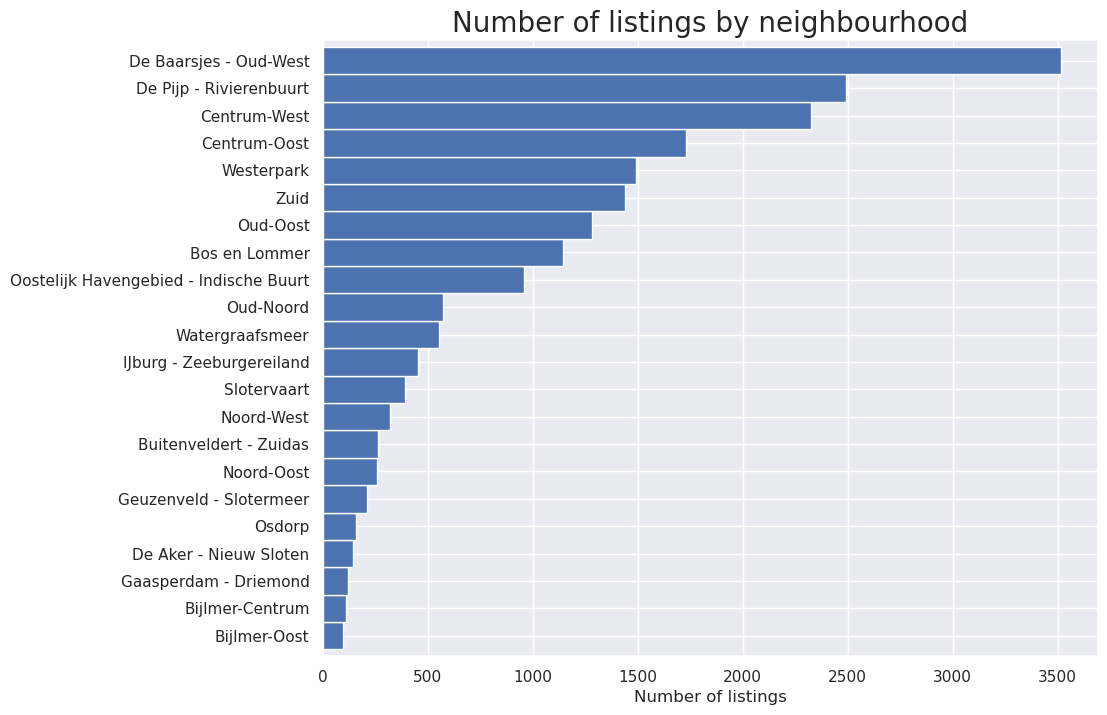

In [14]:
import matplotlib.pyplot as plt
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [15]:
lats2018 = listings['latitude'].to_list()
logs2018 = listings['longitude'].to_list()
locations = list(zip(lats2018, logs2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

<h1>Room types and property types</h1>
The room type is very important in Amsterdam, because Amsterdam has a rule that Entire homes/apartments can only be rented out via Airbnb for a maximum of 60 days a year. Below, we can see that this restriction applies to most of the listings.

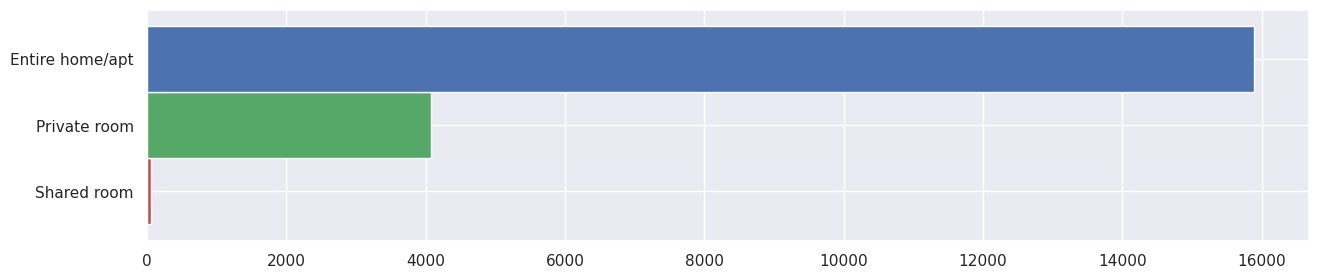

In [16]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15,3), width=1, color=["r","g","b"])
plt.show()

<h2>Property Types</h2>

In [17]:
listings.property_type.unique()

array(['Apartment', 'Townhouse', 'Houseboat', 'Bed and breakfast', 'Boat',
       'Guest suite', 'Loft', 'Serviced apartment', 'House',
       'Boutique hotel', 'Guesthouse', 'Other', 'Condominium', 'Chalet',
       'Nature lodge', 'Tiny house', 'Hotel', 'Villa', 'Cabin',
       'Lighthouse', 'Bungalow', 'Hostel', 'Cottage', 'Tent',
       'Earth house', 'Campsite', 'Castle', 'Camper/RV', 'Barn',
       'Casa particular (Cuba)', 'Aparthotel'], dtype=object)

<h4>Properties based on the property_types and room_type</h4>

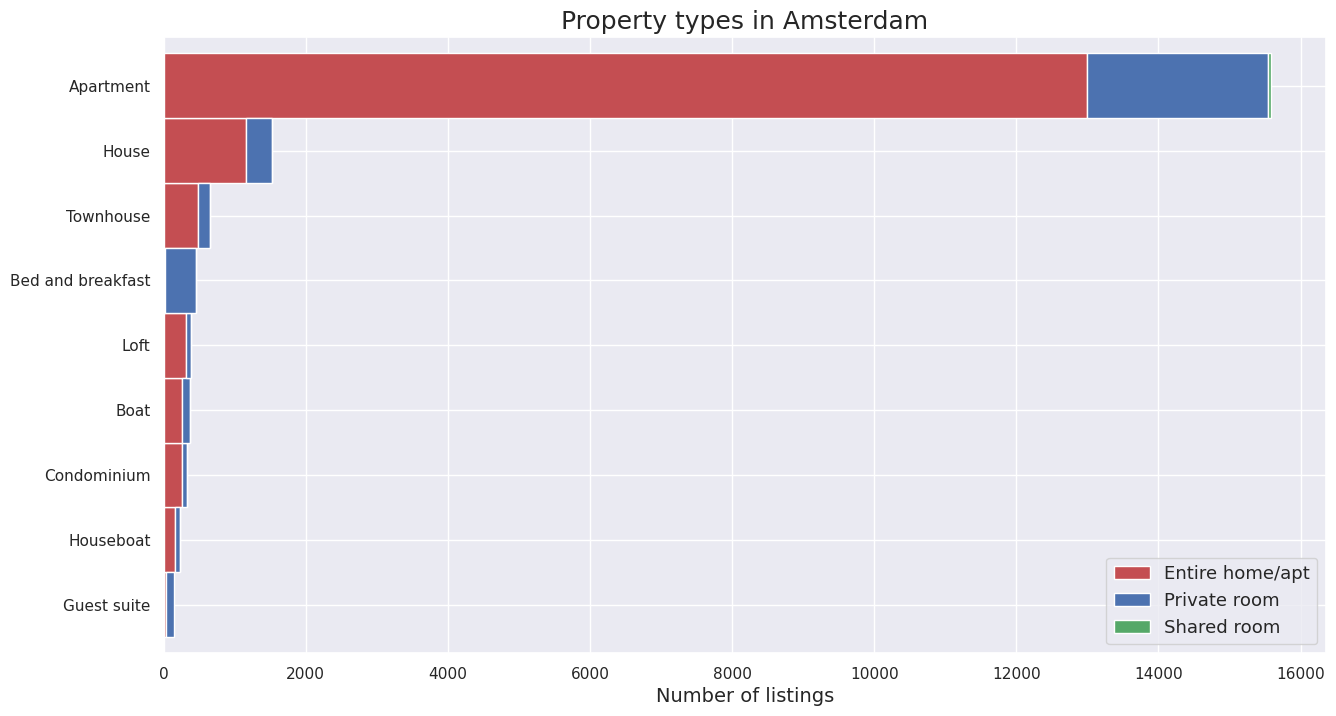

In [18]:
prop = listings.groupby(['property_type', 'room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:, 0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

<h2>Accommodates (number of people)</h2>
As expected, most listings are for 2 people, In addition, Airbnb uses a maximum of 16 guests per listings

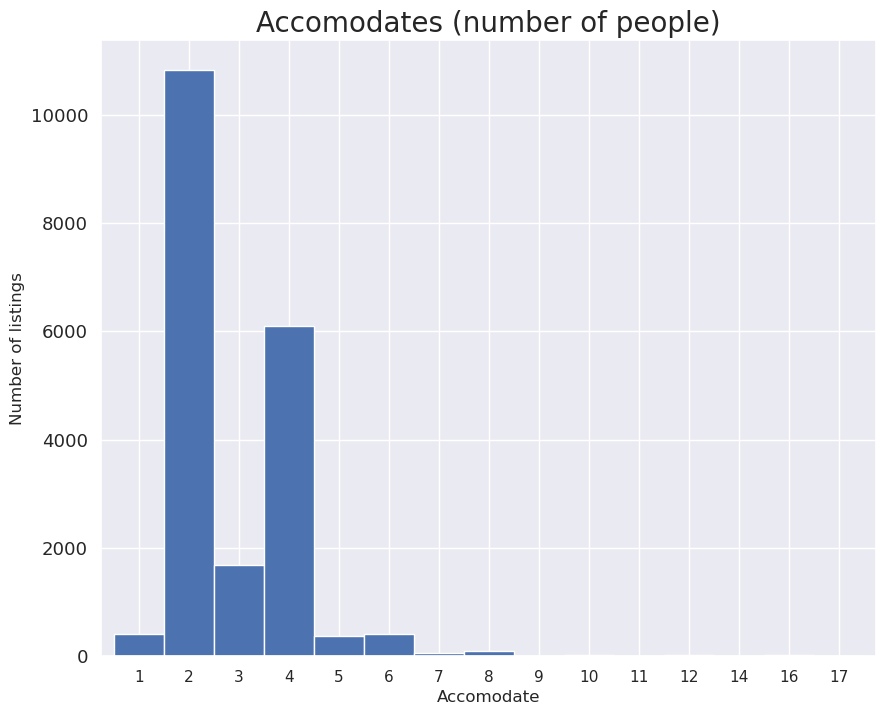

In [19]:
feq = listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accomodates (number of people)", fontsize=20)
plt.ylabel("Number of listings", fontsize=12)
plt.xlabel("Accomodate", fontsize=12)
plt.show()

However, Amsterdam has an additional restriction. Due to fire hazard considerations and also taking possible noisy group into account, owners are only allowed to rent their property to groups with a maximum of 4 people. This actually means that the listings that indicate that the maximum number of people is above 4 are breaking this rule!

# 3. Advice to the municipality of Amsterdam

It is known that Airbnb causes problems in Amsterdam. These problems are described well in this article: [Fed Up With Tourists, Amsterdam Gets Tough On Airbnb, Tourist Taxes And Too Much Partying](https://www.forbes.com/sites/ceciliarodriguez/2018/05/17/amsterdam-overwhelmed-by-tourists-gets-tough-on-airbnb-tourists-taxes-too-much-partying/#5c6c78892be5)

>The coalition of parties forming the city’s new government wants to follow the examples of Barcelona and Venice, where the flood of unruly tourism has made life extremely unpleasant for residents, forcing  officials to try to control the number of visitors and their behavior.

Extra rules that Amsterdam has in place when compared to Airbnb's own rules are:

* The maximum number of guests is 4 (see also previous section)
* The maximum number for short-term rental is 60 days per calendar year. This rules is only for renting out entire properties, and therefore does not apply to renting out private rooms. This rule was already enforced by Airbnb (after 60 days of bookings, Airbnb closes the availability of the listing for the rest of the year). As you can read in the article, the number will be lowered to a maximum of 30 days a year.
* Amsterdam intends to ban Airbnb entirely in three neighourhoods: de Wallen (Red Light District), Kinkerbuurt and Haarlemmerbuurt
* For renting out Private Rooms, there is also the restriction that an owner cannot rent-out rooms that accumulate to more than 40% of the total surface (in square meters)

## 3.1 Finding possibly illegal hotels
Any owner renting out more than 40% of his/her property as Private Rooms is breaking the last rule mentioned in the previous section, but in this section I am only going to look for extreme cases.

Below, I am displaying the  five hosts having the most Private Room listings. Unfortunately, Airbnb does not give the addresses of the listings. The field "street" is actually in the database, but as you can see these are certainly not full, real addresses! Therefore, from this table I cannot say if these listings from are in fact in the same house.


In [21]:
private = listings[listings['room_type'] == 'Private room']
host_private = private.groupby(['host_id', 'host_name', 'street']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head()

,host_id,host_name,street,private_rooms
2436,67005410,Feliciano,"Amsterdam, Noord-Holland, Netherlands",15
918,10076897,Geraldine,"Amsterdam, Noord-Holland, Netherlands",13
2113,44168250,Ruben,"Amsterdam, Noord-Holland, Netherlands",13
1570,22879651,Wamme,"Amsterdam, Noord-Holland, Netherlands",7
3209,174174070,Amrath,"Badhoevedorp, Badhoevedorp, Netherlands",7


However, we have the GPS-coordinates of the listings. To me, it seems very likely that all private rooms that Feliciano offers are in fact in the same building (only minor variations in latitude/longitude). Although this host might have a hotel license, his listings seems suspicius too me (what is the name of the hotel?)! I would advise the municipality of Amsterdam to check if no rules are broken in this case.

In [23]:
feliciano = private[private['host_id'] == 67005410]
feliciano = feliciano[['id', 'name', 'host_name', 'latitude', 'longitude']]
feliciano

,id,name,host_name,latitude,longitude
7336,12392592,Hotel in the heart of Amsterdam 2p,Feliciano,52.375251,4.900321
7365,12444222,Hotel in the heart of Amsterdam 4p,Feliciano,52.375130,4.899694
7368,12446710,Hotel in the heart of Amsterdam 3p,Feliciano,52.374695,4.900266
7370,12451293,"Hotel in the heart of Amsterdam, Single room",Feliciano,52.374682,4.898916
7462,12579177,Hotel in the heart of Amsterdam 2p,Feliciano,52.374567,4.898310
7463,12582071,Hotel in the heart of Amsterdam 3p,Feliciano,52.373407,4.900022
7633,12865293,Hotel in the heart of Amsterdam 2p,Feliciano,52.375077,4.900191
7634,12865495,Hotel in the heart of Amsterdam 2p,Feliciano,52.373396,4.898427
7659,12898673,Hotel in the heart of Amsterdam 1p,Feliciano,52.373346,4.898344
7665,12908561,"Hotel in the heart of Amsterdam, Single room",Feliciano,52.375454,4.899639


<h1>Unwanted effects of professional hosts?</h1>
At the moment, Amsterdam has no rules in place to prevent professional hosting activities. I can imagine that having the option to outsource these activities leads to even more listings. At the moment, about 75% of the hosts only have one listing. I can imagine that hosts with a couple of listings are likely to just also be the hosts for a couple of friends. However, we see that there are extreme cases. I believe that it becomes unlikely that hosts with more than 10 listings are just doing this for themselves and friends and family.

In [25]:
freq = listings.groupby(['host_id']).size().reset_index(name='num_host_listing')
host_prop = freq.groupby(['num_host_listing']).size().reset_index(name='count').transpose()
host_prop.columns = host_prop.iloc[0]
host_prop = host_prop.drop(host_prop.index[0])
host_prop

num_host_listing,1,2,3,4,5,6,7,8,9,10,...,19,21,24,25,27,30,38,83,105,208
count,15830,1104,174,50,37,24,9,6,4,3,...,2,2,1,1,1,1,1,1,1,1


Below, I diplay the hosts with more that 20 listings. Unfortunately, the host_about is not fully scraped. However as this dataset is extremely recent, it was not hard for me to find the host description of the host with 200+ listings on airbnb.com. As you can see, this host clearly is a professional host!

As it is probably hard to implement and control a measure that completely forbids professional hosting activities, I would advise the municipality of Amsterdam to consider setting a maximum number of listings per host that is allowed in Amsterdam. If Amsterdam would set this at for instance 10 (and manages to get this implemented in Airbnb's systems), it would becomes much harder to exploit hosting at Airbnb as a professional activity.

In [30]:
freq = listings.groupby(['host_id', 'host_name', 'host_about']).size().reset_index(name='num_host_listings')
freq = freq.sort_values(by=['num_host_listings'], ascending=False)
freq = freq[freq['num_host_listings'] >= 20]
freq

,host_id,host_name,host_about,num_host_listings
8166,65859990,Martijn,"Hi, I'm Martijn, \r\n\r\nWe are a team of prof...",208
535,1464510,Michiel And Jane,"Hi, we are Michiel & Jane,\r\n\r\nWe are a tea...",105
8999,113977564,Willem,I own a hotel in Amsterdam and manage properti...,38
190,517215,Niels En Viv (Welcome Back),"Hi travellers, \r\n\r\nWe are Welcome Back, a ...",30
4935,14183886,Luis,We are Luis and Melanie and we managed our own...,25
4531,11969034,Raul,"Dear Guests,\r\n\r\nI'm Raul, 35 years old. I ...",24
7456,44168250,Ruben,Running a family business in real estate & tou...,21
3457,7594884,"Ruben, Sarah & Lindy","We are Ruben, Sarah & Lindy, we rent out prope...",21


Hosted by Martijn

Amsterdam, Netherlands · Joined in April 2016

Martijn User Profile: 1928 Reviews, Verified

Hi, I'm Martijn, We are a team of professional hosts established by travelers just like you. We believe in sharing homes. Wherever you are, it is delightful to explore and discover an unknown city from an authentic home. On behalf of home owners we advertise their properties through our airbnb profile and support them by offering you a pleasant stay. When you book your holiday with us, you can be confident of a memorable stay and an experience through the eyes of a local. We are more than happy to share our knowledge, give you the best insider tips and recommendations about Amsterdam. If you have any questions, holiday wishes or simply want to have a chat, then feel free to contact us any time. We always reply within an hour! We look forward to being your host! :)

<h1>Advice to the tourists</h1>
<h2>Average daily price per neighbourhood</h2>
</br>In order to compare "apples to apples" I have only selected the most common type of accommodation, which is accommodation for 2 persons. As expected, accommodation in the city centre is the most expensive. 

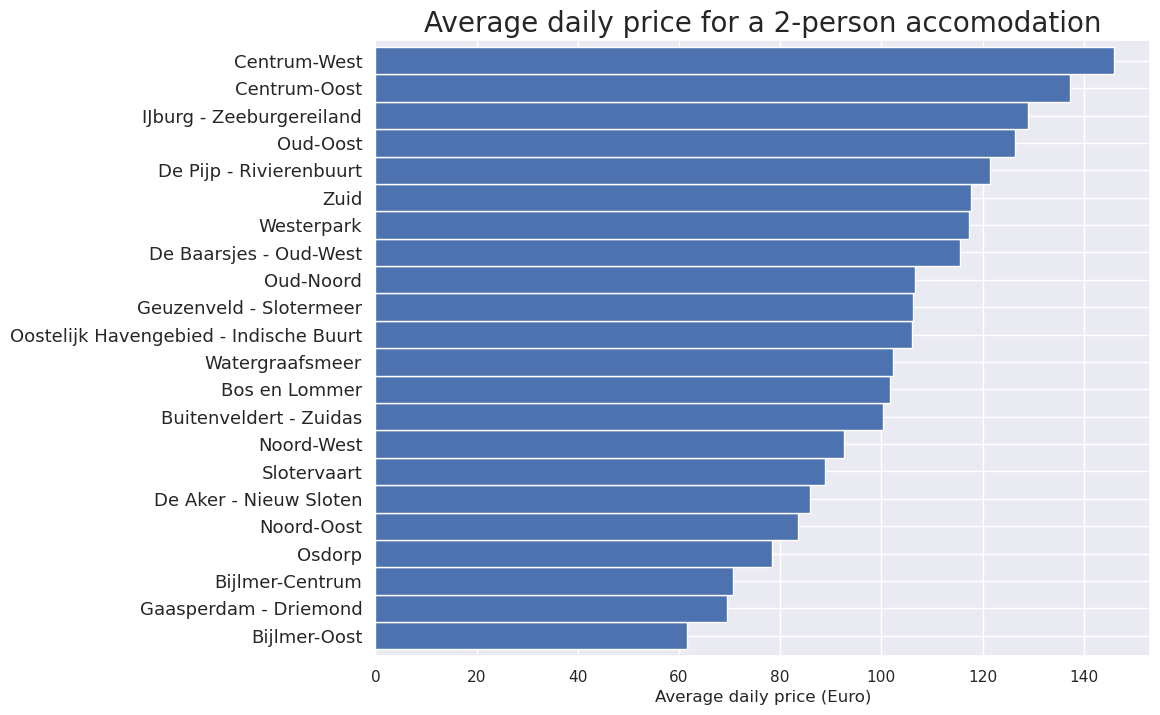

In [32]:
feq = listings[listings['accommodates'] == 2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-person accomodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

Below you can find the neighbourhoods on a map. This map is **interactive**. Hovering over the polygons shows the name of the neighbourhood, and the average price for 2-persons accommodations.

In [34]:
adam = gpd.read_file("./archive/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price' : 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict_dic()
color_scale = LinearColormap(['yellow', 'red'], vmin= min(map_dict.values()), vmax=max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.map(location=[52.3680, 4.9036], zoom_start=11)
folium.GeoJson(data=adam, name='Amsterdam', 
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbour', 'average_price'], 
                labels=True, sticky=False),
              
              style_function = lambda feature:{
              'fillcolor':get_color(feature),
              'color':'black',
              'weight':1,
              'dashArray': '5, 5',
              'fillOpacity': 0.5},
              
              highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: libtiledb.so.2.2: cannot open shared object file: No such file or directory
Importing pyogrio resulted in: No module named 'pyogrio'

## 4.3 Review scores location, and location scores versus price
In tis section, I am grouping the review scores for the location by neighbourhood (only listings with at least 10 reviews). Although I expect the distance to the city centre to an important factor, these score should also take other things into account. Other factors may include:

* The safety of a location (as displayed in the previous section)
* Noise. If a listing is centrally located, but surrounded by noisy bars, that should cost point in the location review score.
* If a listing is located outside the city centre but well connected by public transportation,  it should get bonus points for that.
* Facilities near the listing. Are there any supermarkets, bars and restaurants nearby?
* Some people may be looking for free parking, if they come by car (parking is very expensive in Amsterdam in general).

Below we see that the central neighbourhoods, which were generally also the most expensive, generally also score higher on location review score.  If I would calculate the distance to the city centre for each listing, I expect to see pretty strong correlations between this distance with both price and location review score.

When looking at the average review score, I am surprised to see that the average is above 8/10 for all neighbourhoods! I know that Amsterdam is a small city (much smaller than many people might think!). Therefore, it does not take much time to get to the city centre from anywhere, which might explain the high averages to a certain extend. My personal advice to tourists would be to consider more affordable accommodation outside the city centre, in a safe neighbourhood, and with good public transportation connections to the city centre anyway. However, are the differences between the best locations and outside neighbourhoods really that small? Let's find out in the next section!


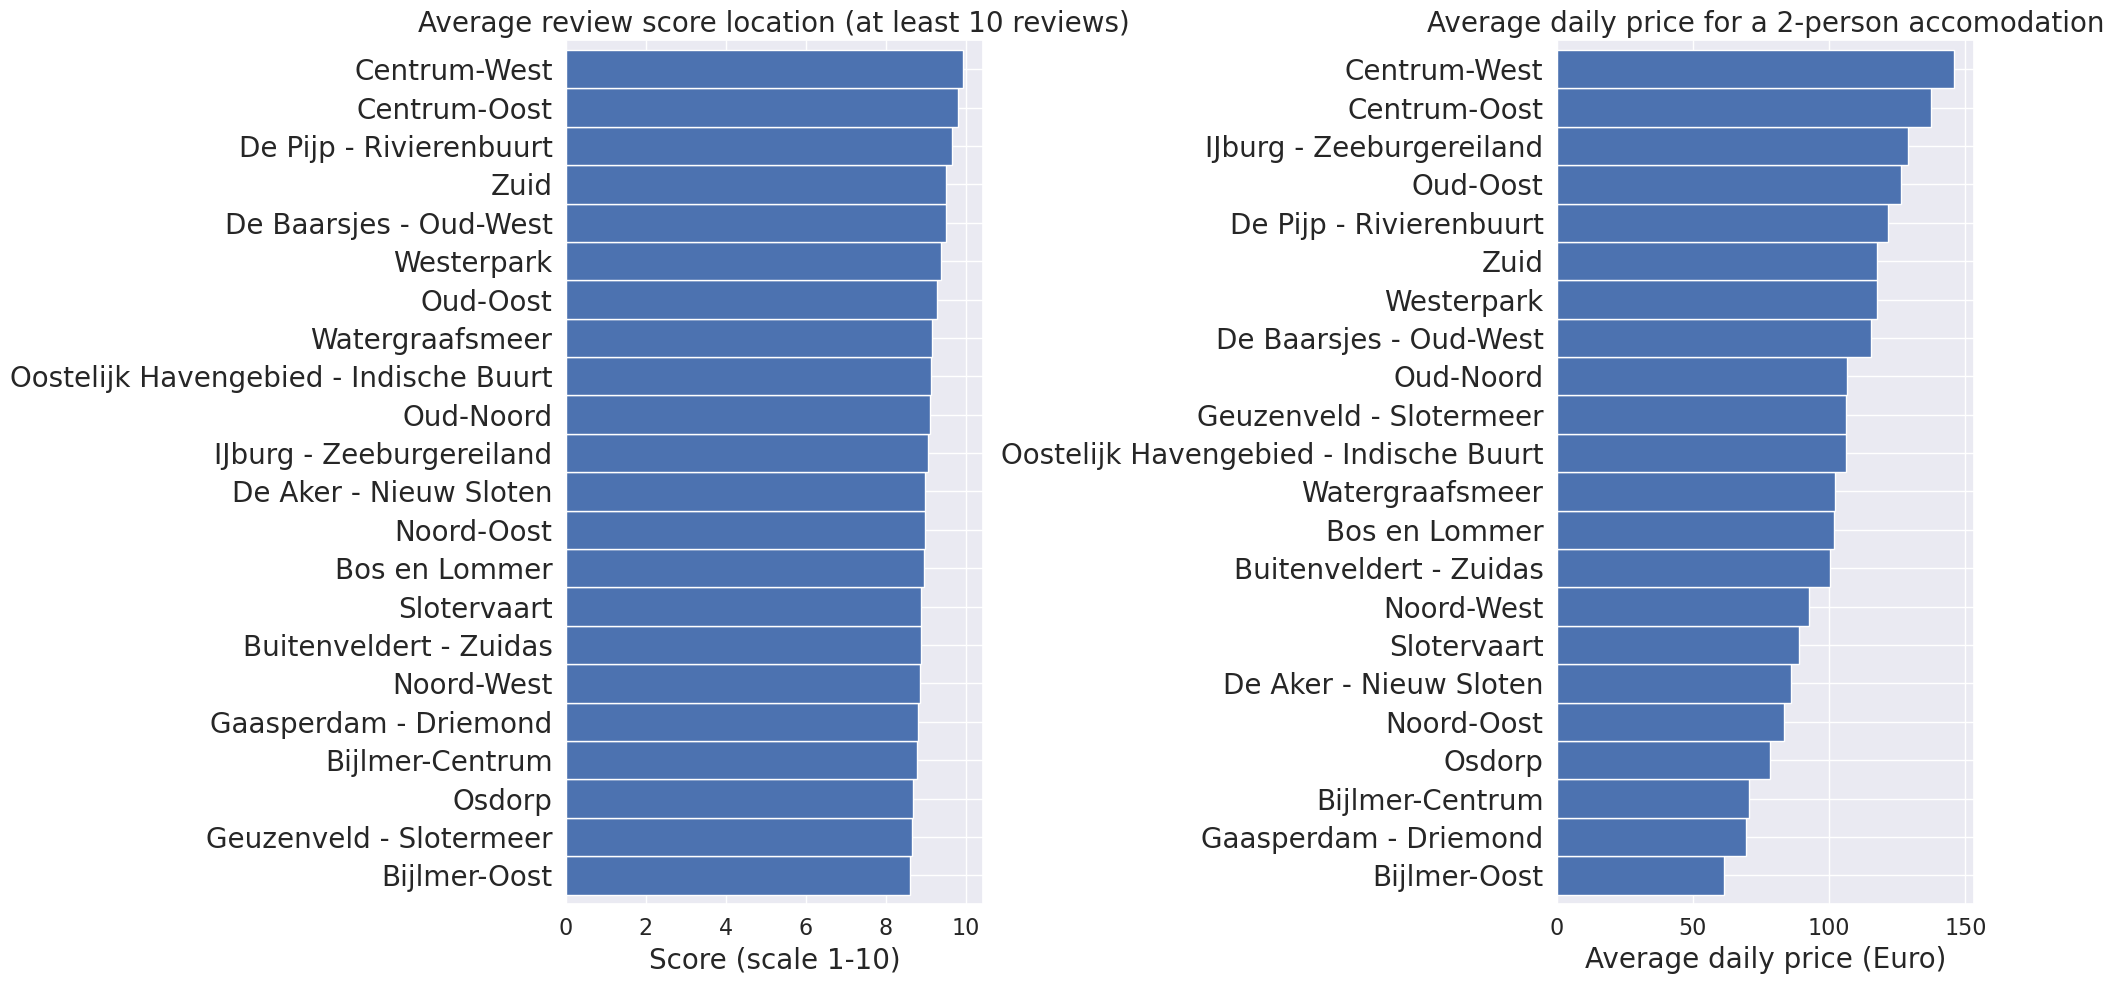

In [38]:
fig = plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1 = feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax1 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2 = feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-person accomodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

## How to use review scores
In addition to written reviews, guests can submit an overall star rating and a set of category star ratings. Guests can give ratings on:

* Overall Experience. What was your guest’s overall experience?
* Cleanliness. Did your guests feel that your space was clean and tidy?
* Accuracy. How accurately did your listing page represent your space?
* Value. Did your guest feel your listing provided good value for the price?
* Communication. How well did you communicate with your guest before and during their stay?
* Arrival. How smoothly did their check-in go?
* Location. How did guests feel about your neighborhood?

Below you can see the scores distribution of all those categories. What caught my eye immediately is that scores seem really high across the board! A quick internet search told me that this seems common across Airbnb. It is explained well in this article: [Higher than the average rating? 95% of Airbnb listings rated 4.5 to 5 stars](https://mashable.com/2015/02/25/airbnb-reviews-above-average/?europe=true#1YLfzOC34sqd).

After having seen the scores distributions, I would personally consider any score of 8 or lower to be not a good score. If I wanted to use any of these scores in a search for accomodation, I believe the "Value" seems most useful. First of all, I always like to get good value for money ;-). However, the number of "10 averages" is reasonably small, which makes the indicator a bit more "distinguishable" than other indicators.

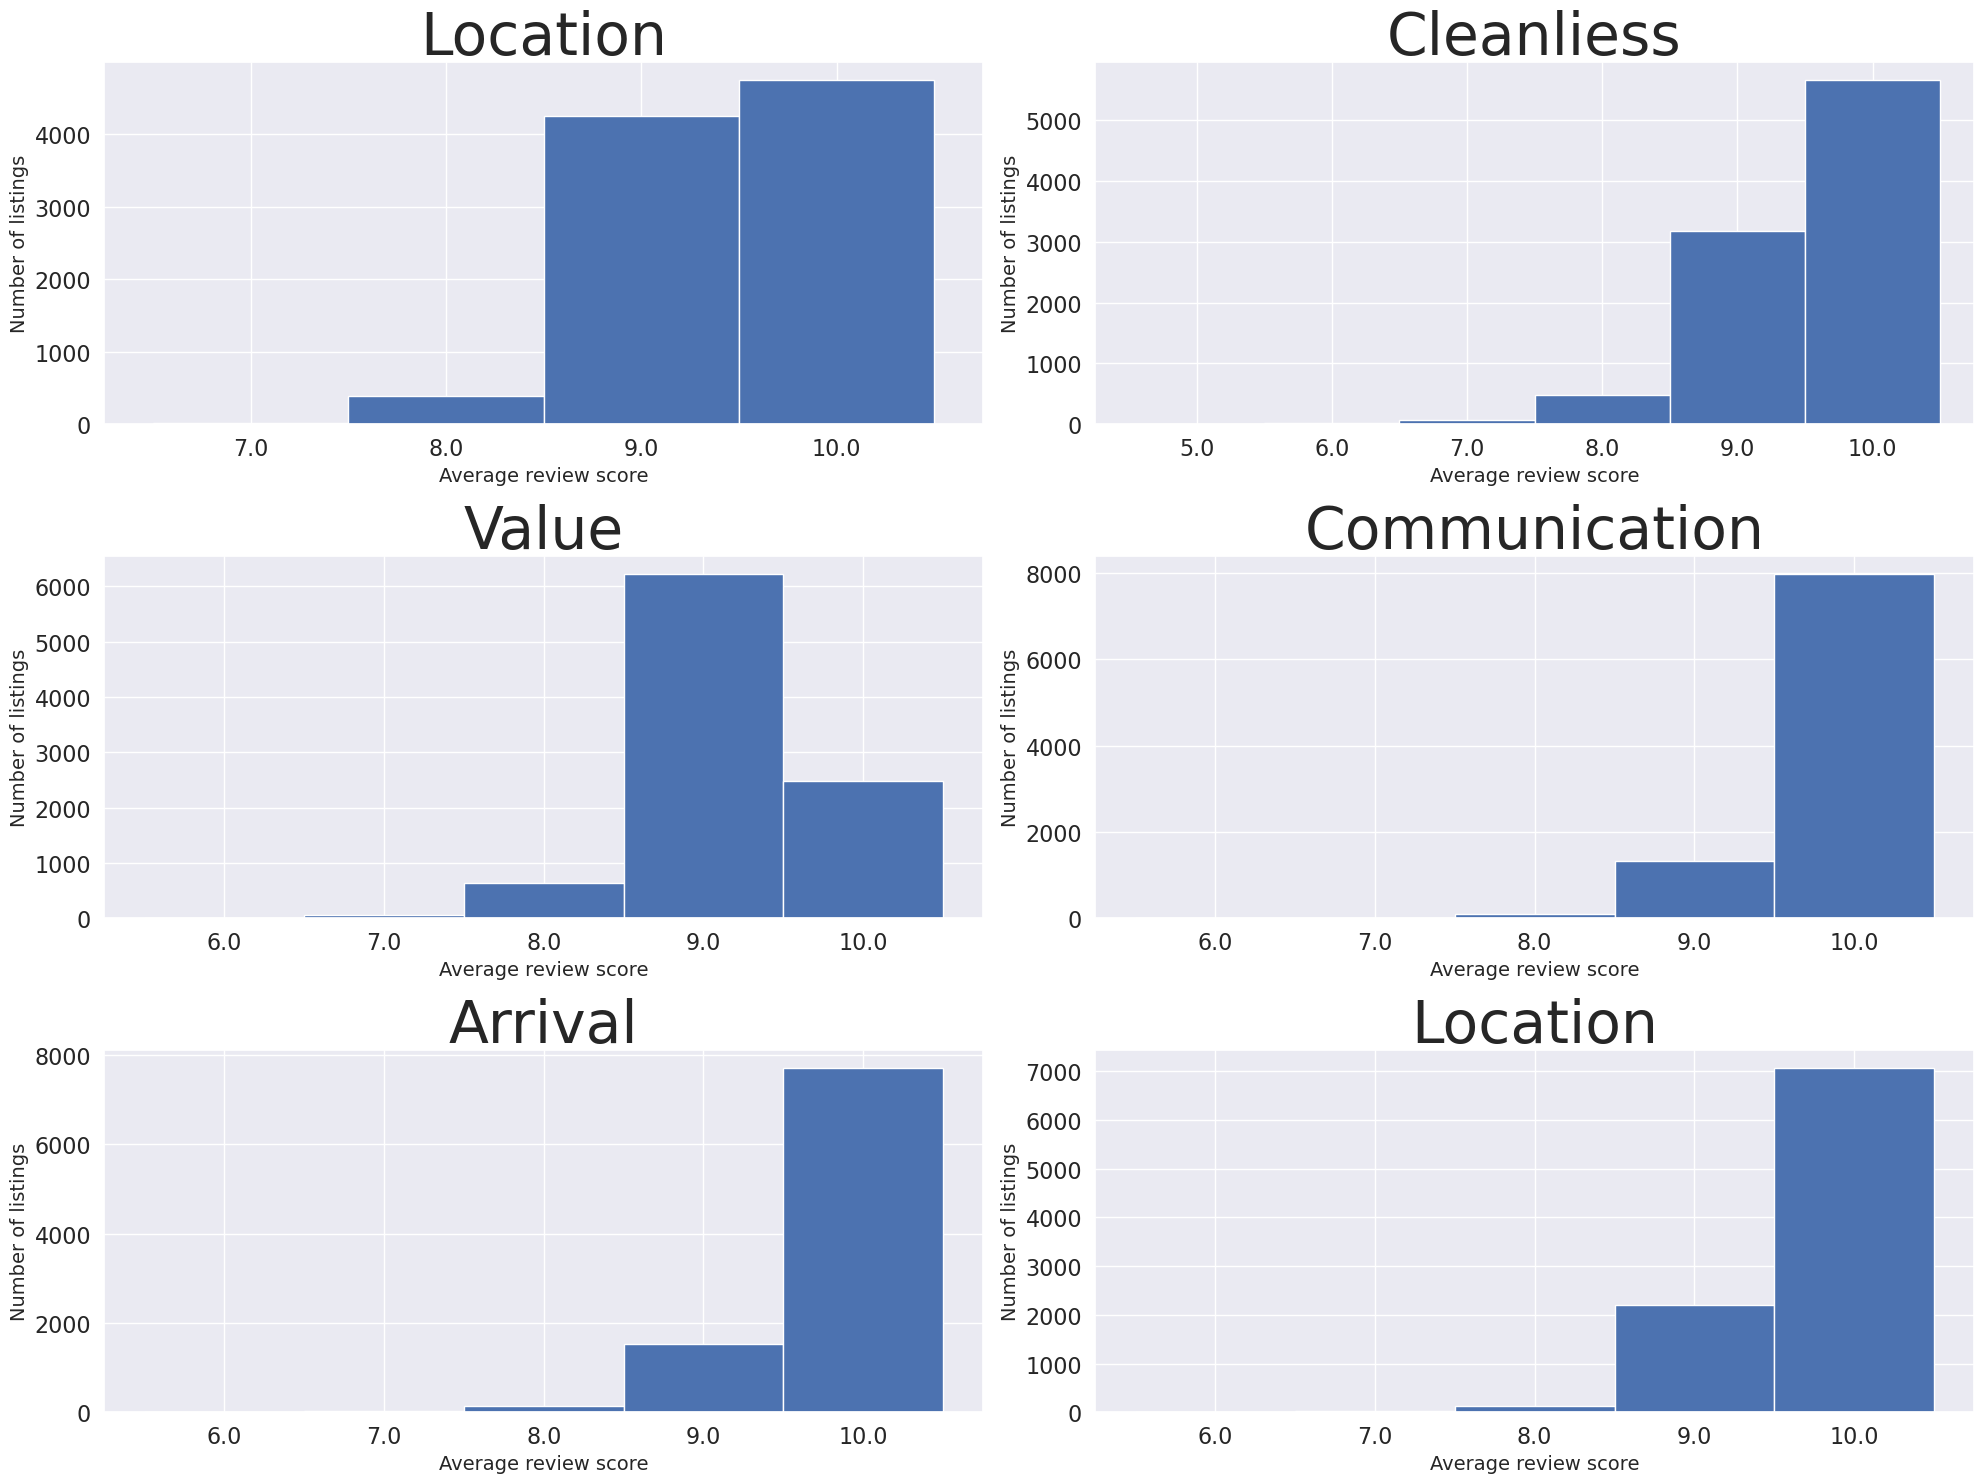

In [41]:
listings10  =listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20, 15))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq = listings10['review_scores_location'].value_counts().sort_index()
ax1 = feq.plot.bar(color='b', width=1, rot=0)
ax1.tick_params(axis='both', labelsize=16)
plt.title("Location", fontsize=42)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax1 = fig.add_subplot(322)
feq = listings10['review_scores_cleanliness'].value_counts().sort_index()
ax1 = feq.plot.bar(color='b', width=1, rot=0)
ax1.tick_params(axis='both', labelsize=16)
plt.title("Cleanliess", fontsize=42)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax1 = fig.add_subplot(323)
feq = listings10['review_scores_value'].value_counts().sort_index()
ax1 = feq.plot.bar(color='b', width=1, rot=0)
ax1.tick_params(axis='both', labelsize=16)
plt.title("Value", fontsize=42)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax1 = fig.add_subplot(324)
feq = listings10['review_scores_communication'].value_counts().sort_index()
ax1 = feq.plot.bar(color='b', width=1, rot=0)
ax1.tick_params(axis='both', labelsize=16)
plt.title("Communication", fontsize=42)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax1 = fig.add_subplot(325)
feq = listings10['review_scores_checkin'].value_counts().sort_index()
ax1 = feq.plot.bar(color='b', width=1, rot=0)
ax1.tick_params(axis='both', labelsize=16)
plt.title("Arrival", fontsize=42)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax1 = fig.add_subplot(326)
feq = listings10['review_scores_accuracy'].value_counts().sort_index()
ax1 = feq.plot.bar(color='b', width=1, rot=0)
ax1.tick_params(axis='both', labelsize=16)
plt.title("Location", fontsize=42)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

## Finding a good host
At Airbnb you can get the status "Superhost". From Airbnb:
* As a Superhost, you’ll have more visibility, earning potential, and exclusive rewards. It's our way of saying thank you for your outstanding hospitality.
* How to become a Superhost: Every 3 months, we check if you meet the following criteria. If you do, you'll earn or keep your Superhost status.
    * Superhosts have a 4.8 or higher average overall rating based on reviews from at least 50% of their Airbnb guests in the past year. 
    * Superhosts have hosted at least 10 stays in the past year or, if they host longer-term reservations, 100 nights over at least 3 stays. 
    * Superhosts have no cancellations in the past year, unless there were extenuating circumstances.
    * Superhosts respond to 90% of new messages within 24 hours.

Below, we can see that only a small portion of the listings in Amsterdam do have a host who is Superhost.

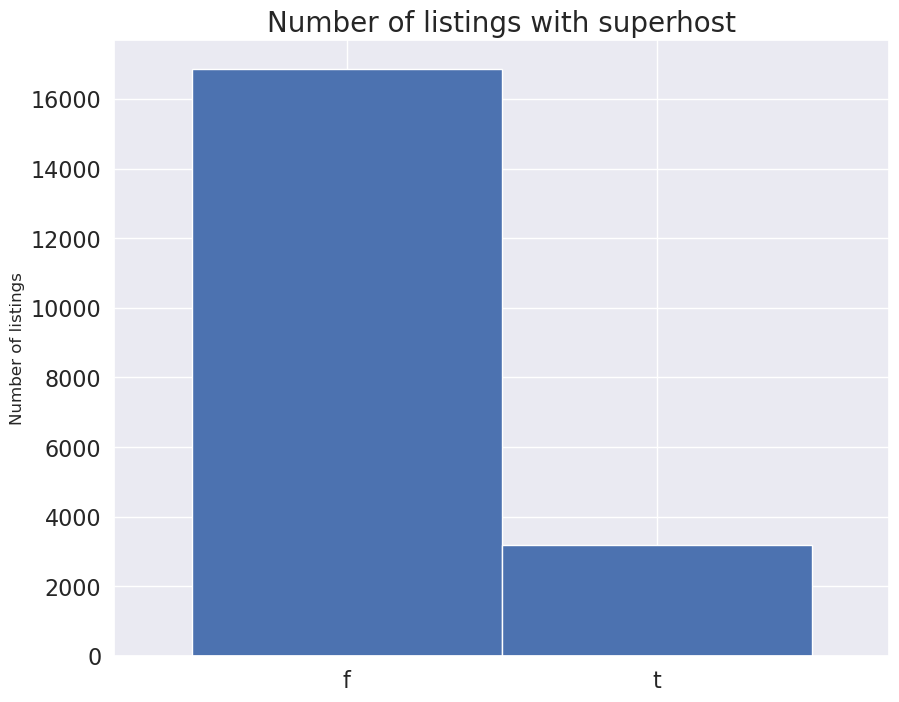

In [43]:
feq = listings['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

If I were to book accomomodation, I would not necessarily look for a superhost. Actually, I would be afraid that I would pay too much as superhost will likely increase their prices. However, I would also not want to host that responds badly, or cancels a lot.

As we can see, over 5,000 of the 20,000 listings have at least 10 reviews and respond to at least 90% of the new messages. I would consider those hosts "proven" good responders (which does not mean that a listing with less than 10 reviews cannot have good responding hosts; it is just not proven yet). Also, there are very few listings with hosts not replying to new messages within 24 hours.

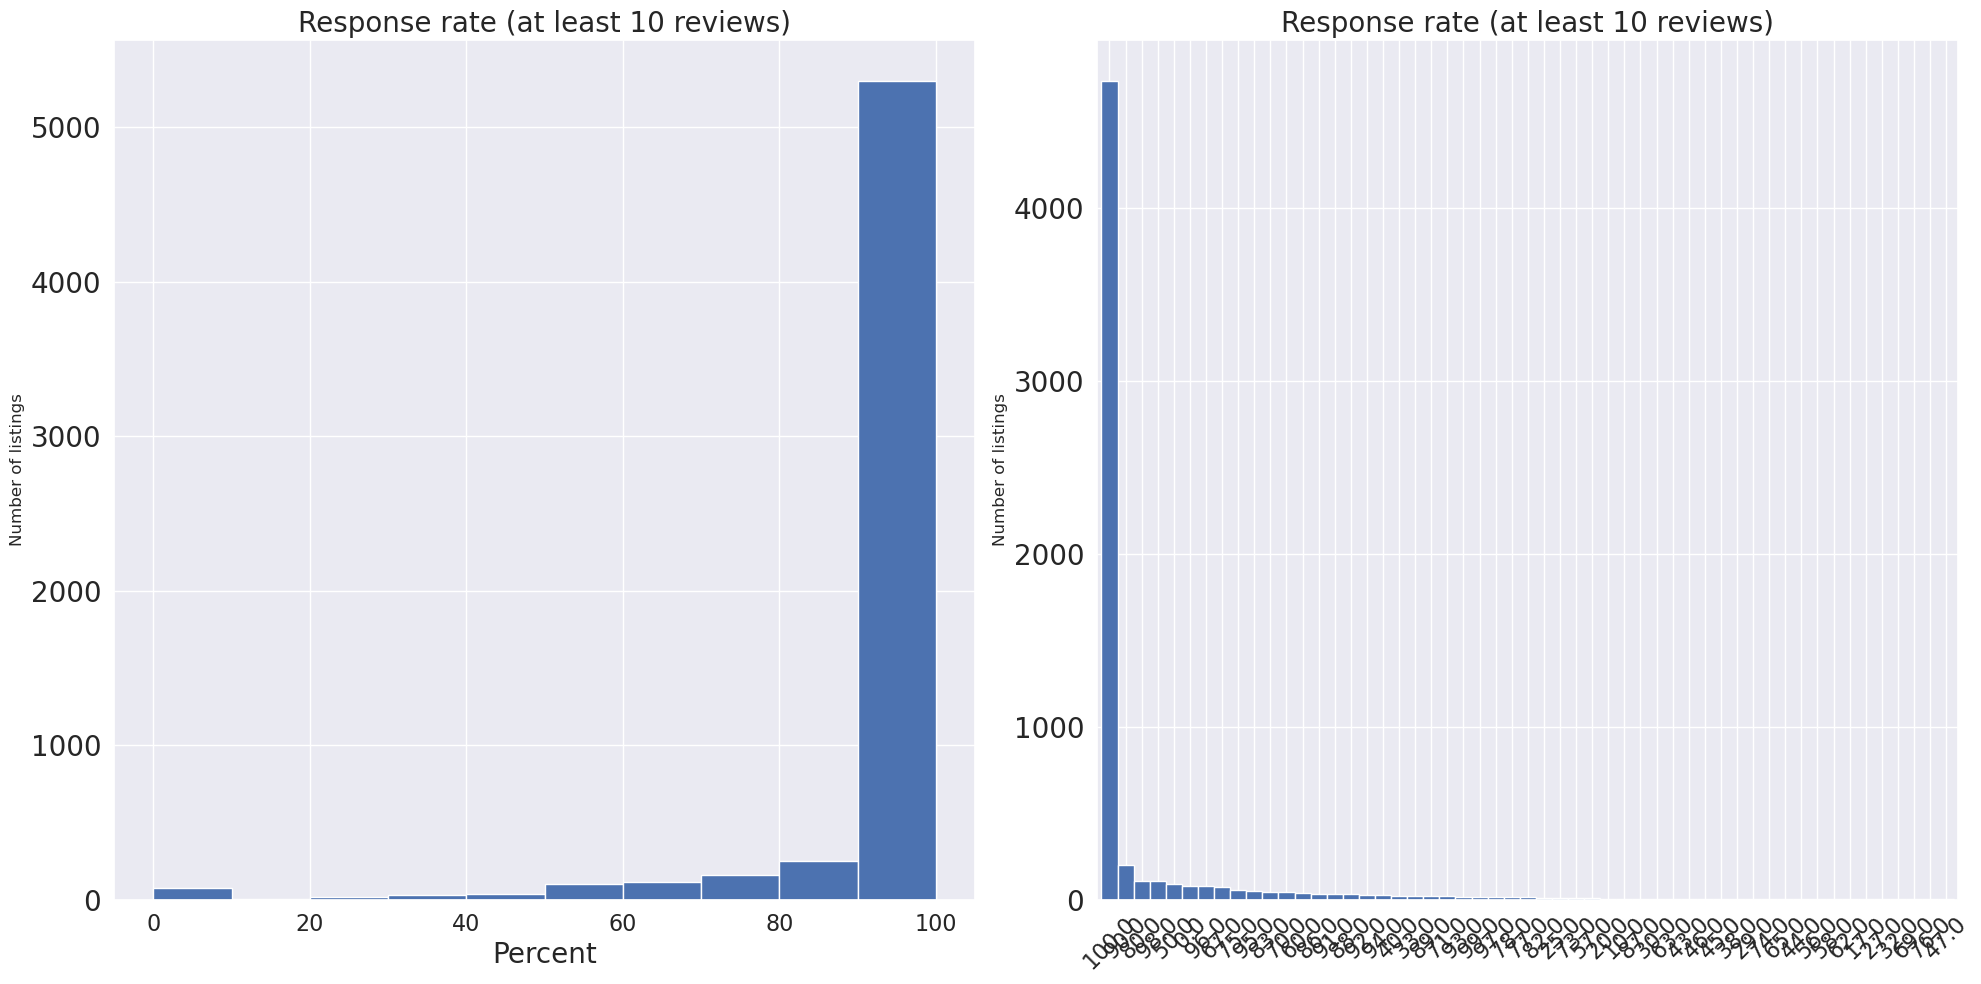

In [44]:
fig = plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10['host_response_rate'].dropna()
ax1 = plt.hist(feq1)
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("Number of listings")
plt.xlabel("Percent", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10['host_response_rate'].value_counts()
ax2 = feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("Number of listings")

plt.tight_layout()
plt.show()

In [45]:
listings.host_response_rate.unique()

array([100.,   0.,  91.,  nan,  80.,  67.,  70.,  78.,  90.,  92.,  50.,
        95.,  71.,  40.,  75.,  33.,  93.,  96.,  98.,  83.,  82.,  43.,
        94.,  86.,  88.,  10.,  60.,  32.,  25.,  46.,  76.,  57.,  45.,
        73.,  63.,  97.,  89.,  20.,  56.,  44.,  30.,  29.,  99.,  69.,
        87.,  65.,  17.,  77.,  27.,  38.,  62.,  58.,  74.,  47.,  55.,
        85.,  53.,  79.,  66.])

In [46]:
listings['host_response_rate'].max()

100.0

In [47]:
listings['review_scores_cleanliness'].value_counts()

10.0    10691
9.0      5019
8.0      1200
7.0       229
6.0       159
4.0        35
2.0        27
5.0        20
3.0         3
Name: review_scores_cleanliness, dtype: int64

In [50]:
feq = listings
feq1 = feq.groupby('neighbourhood')['review_scores_location'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
feq1

,mean,count
neighbourhood,,
Centrum-West,9.897087,2060
Centrum-Oost,9.753516,1493
De Pijp - Rivierenbuurt,9.620224,2146
De Baarsjes - Oud-West,9.476452,3100
Zuid,9.470199,1208
Westerpark,9.396513,1319
Oud-Oost,9.323993,1142
IJburg - Zeeburgereiland,9.205882,374
Oostelijk Havengebied - Indische Buurt,9.184397,846
